<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    5000 non-null   int64  
 1   Age           5000 non-null   int64  
 2   ZIP Code      5000 non-null   int64  
 3   Family        5000 non-null   int64  
 4   Experience    5000 non-null   int64  
 5   Income        5000 non-null   int64  
 6   CCAvg         5000 non-null   float64
 7   Mortgage      5000 non-null   int64  
 8   EducUgrad     5000 non-null   int64  
 9   EducGrad      5000 non-null   int64  
 10  EducProf      5000 non-null   int64  
 11  Securities    5000 non-null   int64  
 12  CD            5000 non-null   int64  
 13  Online        5000 non-null   int64  
 14  CreditCard    5000 non-null   int64  
 15  PersonalLoan  5000 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 625.1 KB


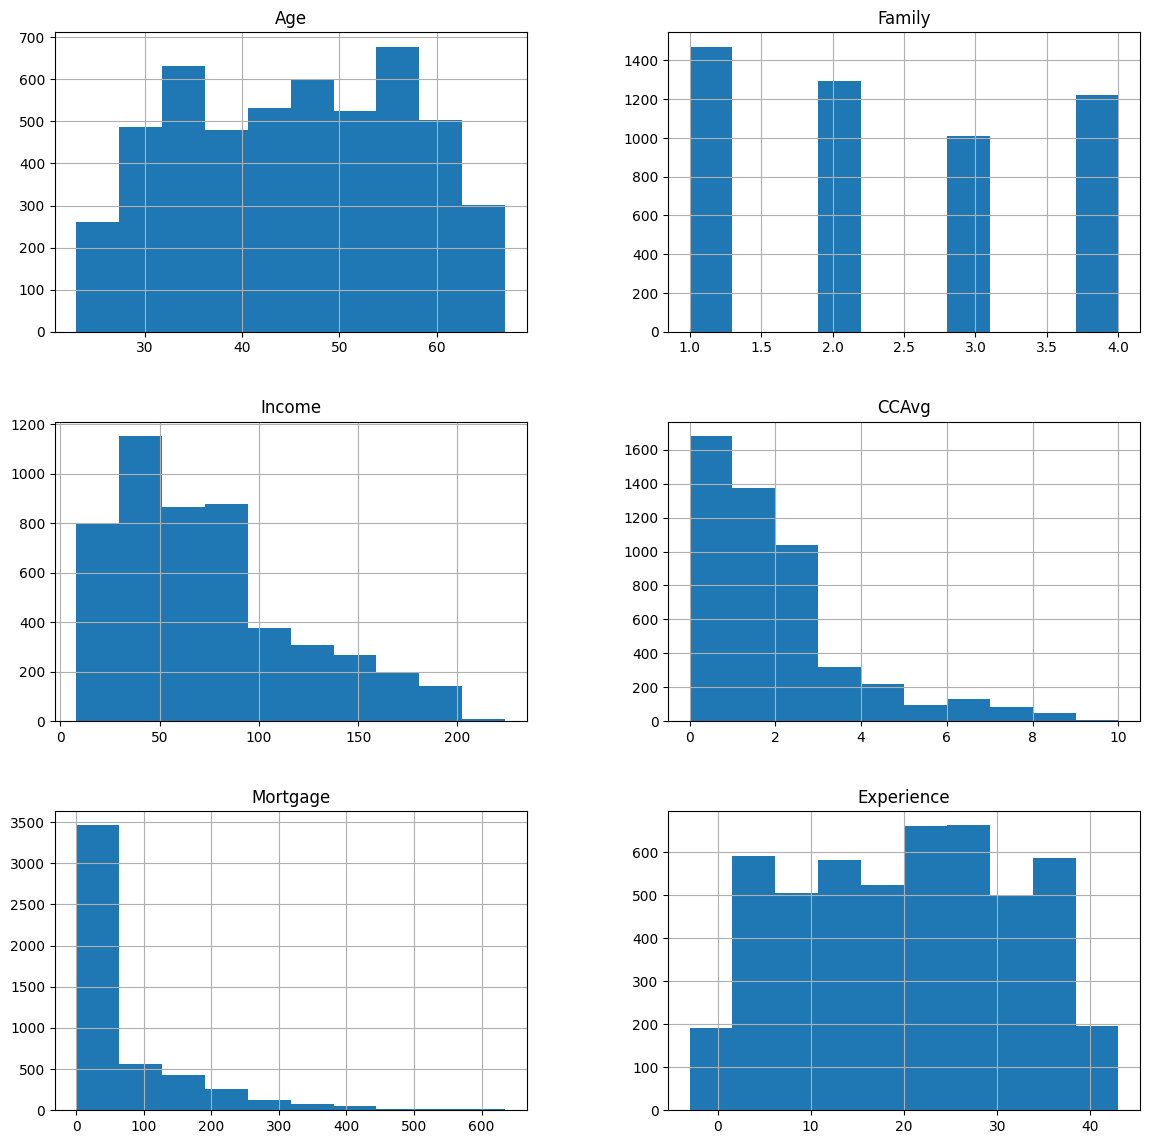

ZIP Code
94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
96145    0.0002
94087    0.0002
91024    0.0002
9307     0.0002
94598    0.0002
Name: proportion, Length: 467, dtype: float64
****************************************
EducUgrad
0    0.5808
1    0.4192
Name: proportion, dtype: float64
****************************************
EducProf
0    0.6998
1    0.3002
Name: proportion, dtype: float64
****************************************
EducGrad
0    0.7194
1    0.2806
Name: proportion, dtype: float64
****************************************
Securities
0    0.8956
1    0.1044
Name: proportion, dtype: float64
****************************************
CD
0    0.9396
1    0.0604
Name: proportion, dtype: float64
****************************************
Online
1    0.5968
0    0.4032
Name: proportion, dtype: float64
****************************************
CreditCard
0    0.706
1    0.294
Name: proportion, dtype: float64
*************************

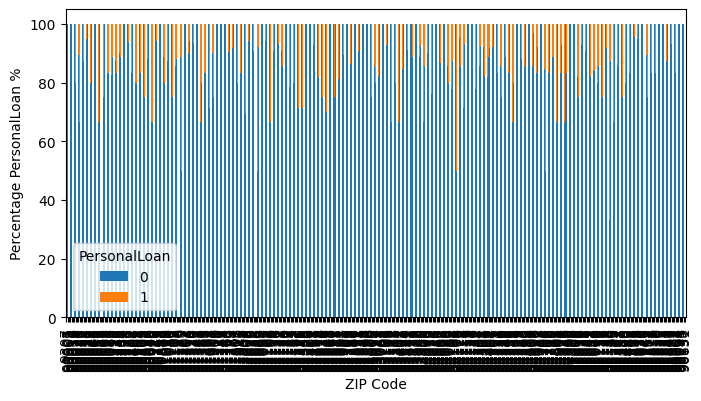

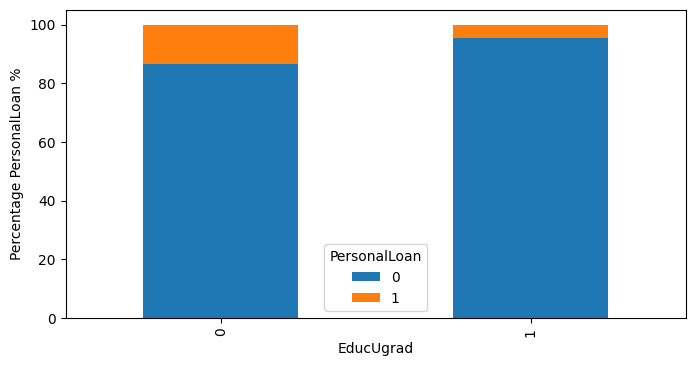

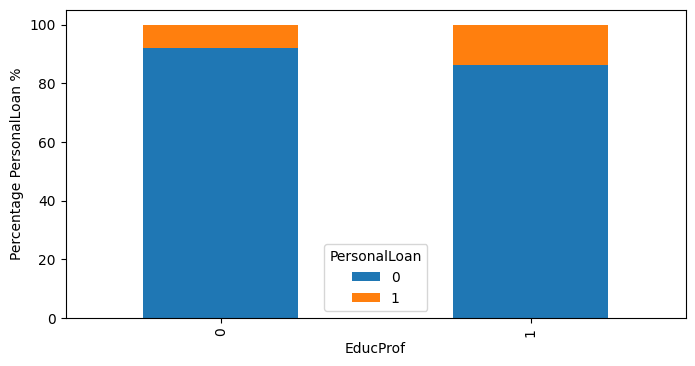

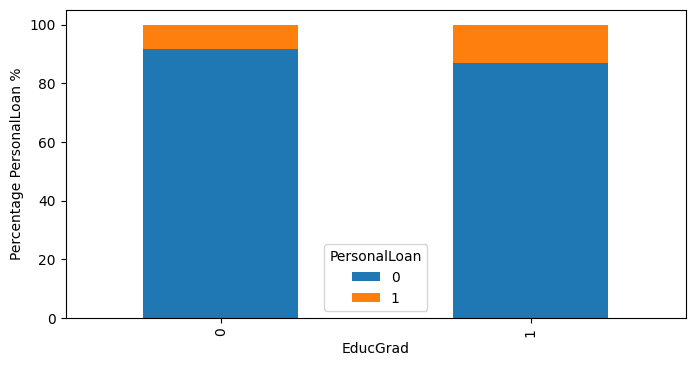

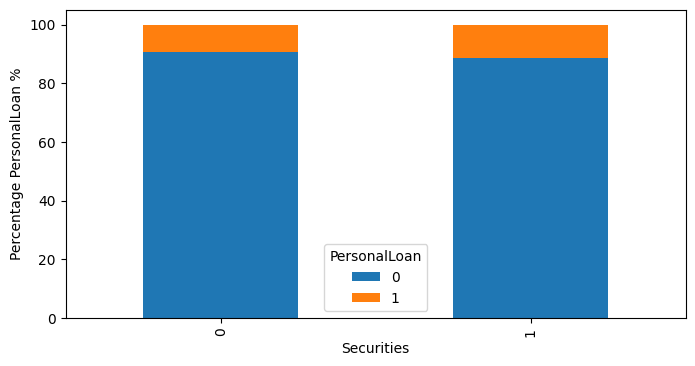

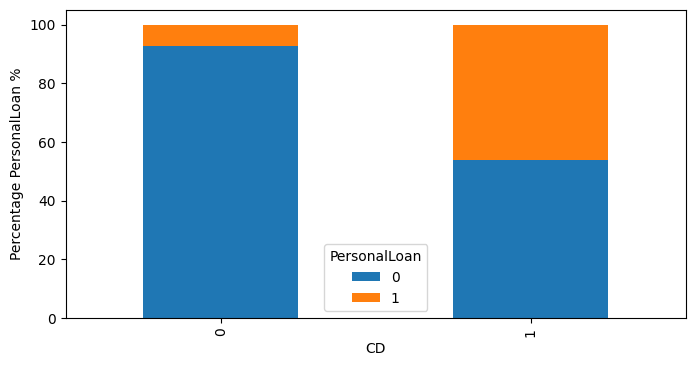

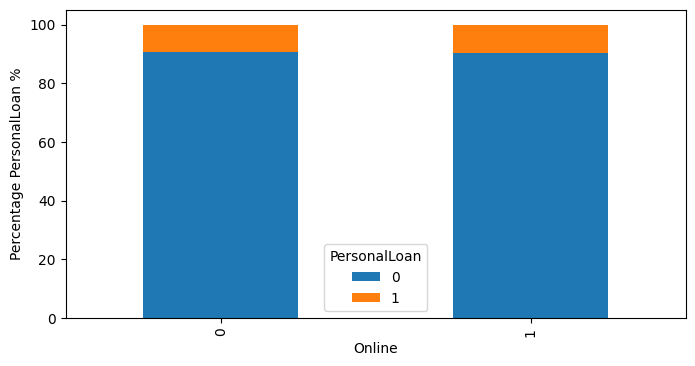

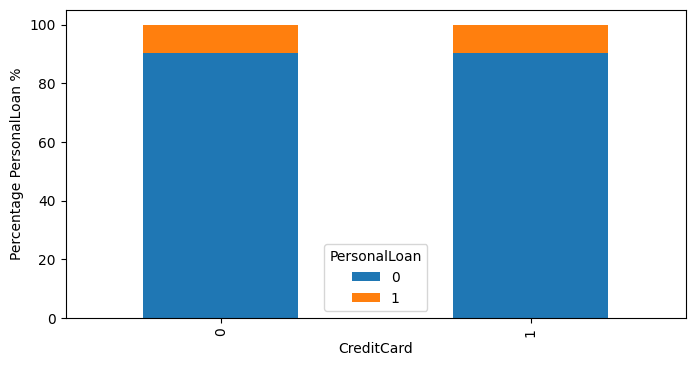

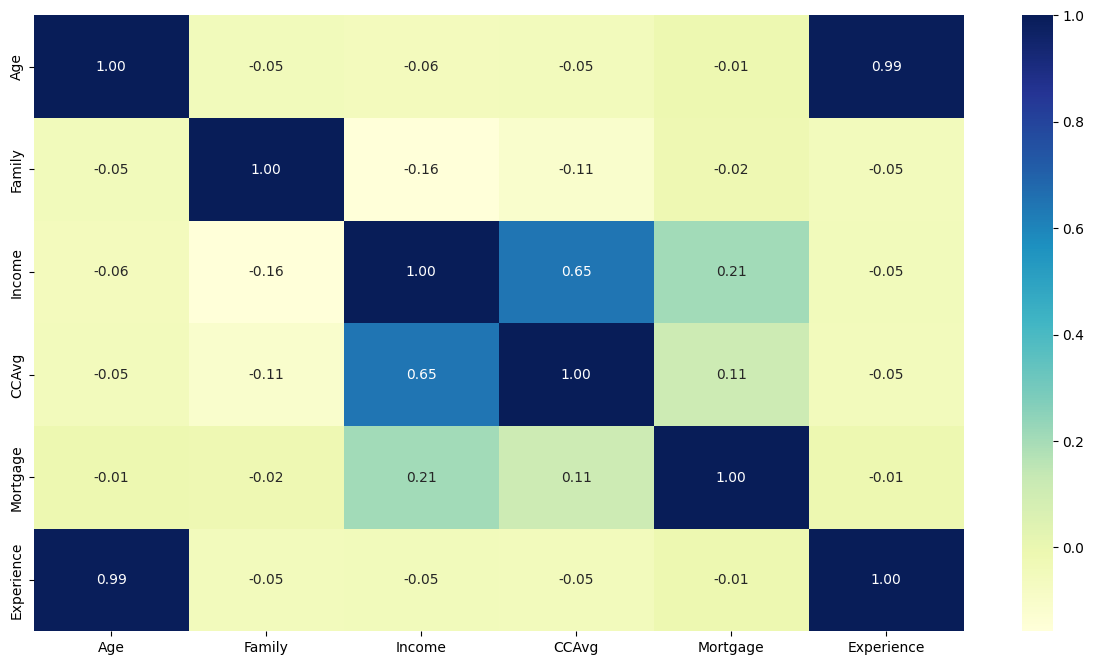

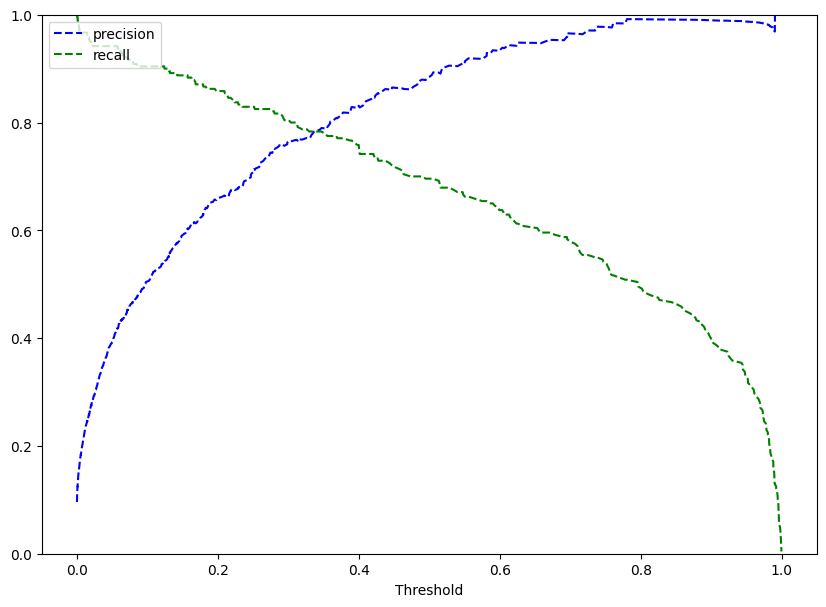

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2260
           1       0.79      0.78      0.78       240

    accuracy                           0.96      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.96      0.96      0.96      2500



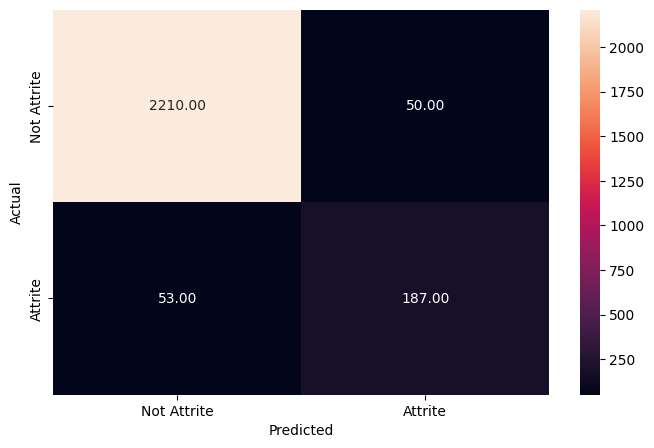

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2260
           1       0.79      0.71      0.75       240

    accuracy                           0.95      2500
   macro avg       0.88      0.84      0.86      2500
weighted avg       0.95      0.95      0.95      2500



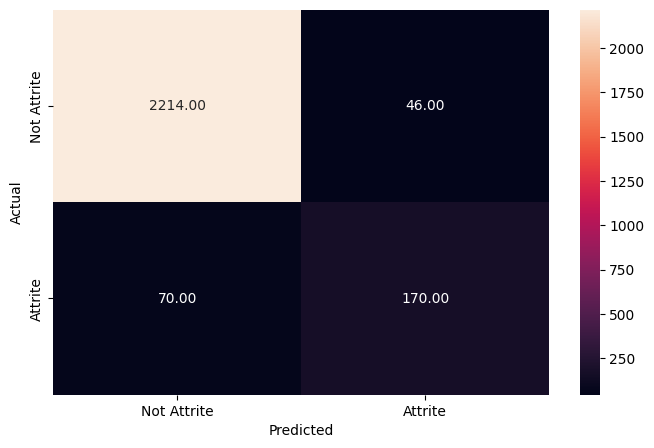

In [5]:
import pandas as pd
import numpy as np
from sklearn import metrics
import statsmodels.formula.api as sm

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# import library for preparing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_curve,
)

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")
df = pd.read_excel("Better Table.xlsx")
df.head()
df.info()
df.nunique()
df = df.drop(["CustomerID"], axis=1)
# Creating numerical columns
num_cols = ["Age", "Family", "Income", "CCAvg", "Mortgage", "Experience"]
# Creating categorical variables
cat_cols = [
    "ZIP Code",
    "EducUgrad",
    "EducProf",
    "EducGrad",
    "Securities",
    "CD",
    "Online",
    "CreditCard",
    "PersonalLoan",
]

df[num_cols].describe().T
df[num_cols].hist(figsize=(14, 14))
plt.show()
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print("*" * 40)
for i in cat_cols:
    if i != "PersonalLoan":
        (pd.crosstab(df[i], df["PersonalLoan"], normalize="index") * 100).plot(
            kind="bar", figsize=(8, 4), stacked=True
        )
        plt.ylabel("Percentage PersonalLoan %")

# Mean of numerical varibles grouped by PersonalLoan
df.groupby(["PersonalLoan"])[num_cols].mean()
# plotting the correation between numerical variables
plt.figure(figsize=(15, 8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt="0.2f", cmap="YlGnBu")



# Separating target variable and other variables
Y = df["PersonalLoan"]
X = df.drop(columns=["PersonalLoan"])
# Scaling the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
# splitting the data
# x_test = x_validation
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.5, stratify=Y
)

# creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt=".2f",
        xticklabels=["Not Attrite", "Attrite"],
        yticklabels=["Not Attrite", "Attrite"],
    )
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# fitting logistic regression model
lg = LogisticRegression(max_iter=10000)
lg.fit(x_train, y_train)

# printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

print(pd.DataFrame(coef_lg, columns=cols).T.sort_values(by=0, ascending=False))

odds = np.exp(lg.coef_[0])  # finding the odds

# adding the odds to a dataframe and sorting the values
print(
    pd.DataFrame(odds, x_train.columns, columns=["odds"]).sort_values(
        by="odds", ascending=False
    )
)


y_scores_lg = lg.predict_proba(
    x_train
)  # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(
    y_train, y_scores_lg[:, 1]
)

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10, 7))
plt.plot(thresholds_lg, precisions_lg[:-1], "b--", label="precision")
plt.plot(thresholds_lg, recalls_lg[:-1], "g--", label="recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

# Checking perf on training data
optimal_threshold1 = 0.35
y_pred_train = lg.predict_proba(x_train)
metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)

# Checking perf on test (validation) data
optimal_threshold1 = 0.35
y_pred_test = lg.predict_proba(x_test)
metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)


# # create the model
# model1 = sm.OLS(endog=y_train, exog=x_train)
# model1_res = model1.fit()

# # get the model summary
# model1_res.summary()